In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)

In [162]:
missing_values = ["n/a", "na", "undefined"]
df_clean = pd.read_csv(r"C:\\Users\\dell\\Desktop\\Week1_challenge_data_sourcex.csv",na_values = missing_values, encoding="latin-1")
df_clean.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,65.0,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,65.0,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,NaN,Huawei B528S-23A,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,65.0,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
df_clean=df_clean.rename(columns = {'Total DL (Bytes)' : 'totalDL','Total UL (Bytes)' : 'totalUL','Dur. (ms)' : 'dur','MSISDN/Number':'msisdn','Last Location Name':'location','Handset Manufacturer':'manufacturer','Handset Type':'handset'})




google = df_clean['Google DL (Bytes)']+ df_clean['Google UL (Bytes)']
email = df_clean['Email DL (Bytes)']+ df_clean['Email UL (Bytes)']
gaming = df_clean['Gaming DL (Bytes)']+ df_clean['Gaming UL (Bytes)']
youtube = df_clean['Youtube DL (Bytes)']+ df_clean['Youtube UL (Bytes)']
netflix = df_clean['Netflix DL (Bytes)']+ df_clean['Netflix UL (Bytes)']
social = df_clean['Social Media DL (Bytes)']+ df_clean['Social Media UL (Bytes)']

df_clean['google']=google
df_clean['email']=email
df_clean['gaming']=gaming
df_clean['youtube']=youtube
df_clean['netflix']=netflix
df_clean['social']=social

relevant_data=df_clean[['msisdn','dur','totalUL', 'totalDL', 'google','email','gaming','youtube','netflix','social']]

#### building a dataframe containg the relevant variables

In [4]:
relevant_data.describe()

,msisdn,dur,totalUL,totalDL,google,email,gaming,youtube,netflix,social
count,1.489350e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,4.188282e+10,1.046086e+05,4.112121e+07,4.546434e+08,7.807295e+06,2.259102e+06,4.303331e+08,2.264348e+07,2.262861e+07,1.828250e+06
std,2.447443e+12,8.103762e+04,1.127639e+07,2.441429e+08,3.516420e+06,1.071109e+06,2.440199e+08,9.246800e+06,9.260820e+06,1.035646e+06
min,3.360100e+10,7.142000e+03,2.866892e+06,7.114041e+06,4.033000e+04,8.359000e+03,3.063580e+05,7.890300e+04,9.843200e+04,1.563000e+03
25%,3.365130e+10,5.744050e+04,3.322201e+07,2.431068e+08,4.943599e+06,1.359344e+06,2.187279e+08,1.599846e+07,1.597946e+07,9.322180e+05
50%,3.366371e+10,8.639900e+04,4.114331e+07,4.558411e+08,7.812835e+06,2.263567e+06,4.316150e+08,2.266177e+07,2.263554e+07,1.826471e+06
75%,3.368349e+10,1.324302e+05,4.903424e+07,6.657055e+08,1.068280e+07,3.159818e+06,6.414159e+08,2.929260e+07,2.929044e+07,2.727487e+06
max,8.823971e+14,1.859336e+06,7.833131e+07,9.029696e+08,1.552878e+07,4.518036e+06,8.592028e+08,4.519008e+07,4.519815e+07,3.650861e+06


## Insights

I)   Users download more than they upload
II)  Users upload data is more distributed than the download data
III) Users spend more on games than on social medial and other platforms

<AxesSubplot:>

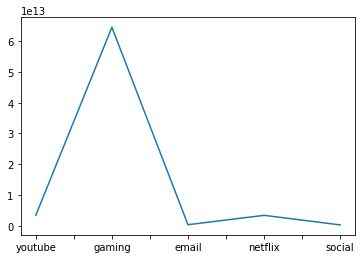

In [5]:
relevant_data[['youtube','gaming','email','netflix','social']].sum().plot(kind='line')

<AxesSubplot:title={'center':'Top user application engagment'}, ylabel='None'>

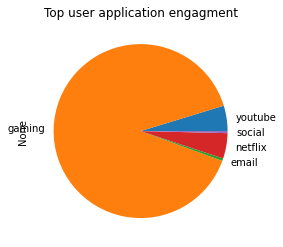

In [6]:
relevant_data[['youtube','gaming','email','netflix','social']].sum().plot(kind='pie', title="Top user application engagment")

##### The above plots show that users spend more time on gaming and then after youtube

# Univariate Analysis

#### Non Graphical and graphical

In [8]:
# important statistical measurements of center and dispersion
relevant_data[['social']].describe()

,social
count,1.500010e+05
mean,1.828250e+06
std,1.035646e+06
min,1.563000e+03
25%,9.322180e+05
50%,1.826471e+06
75%,2.727487e+06
max,3.650861e+06


In [9]:
df_clean['dur'].describe()

count    1.500000e+05
mean     1.046086e+05
std      8.103762e+04
min      7.142000e+03
25%      5.744050e+04
50%      8.639900e+04
75%      1.324302e+05
max      1.859336e+06
Name: dur, dtype: float64

(array([1.37277e+05, 1.10520e+04, 1.14600e+03, 3.19000e+02, 1.09000e+02,
        5.00000e+01, 2.10000e+01, 1.70000e+01, 3.00000e+00, 6.00000e+00]),
 array([   7142. ,  192361.4,  377580.8,  562800.2,  748019.6,  933239. ,
        1118458.4, 1303677.8, 1488897.2, 1674116.6, 1859336. ]),
 <BarContainer object of 10 artists>)

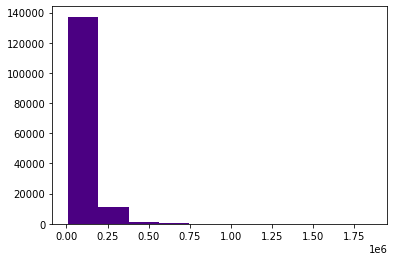

In [86]:
plt.hist(df_clean['dur'],bins=10, color='indigo')

##### its rightly skewed, most data is in the 75th quartile

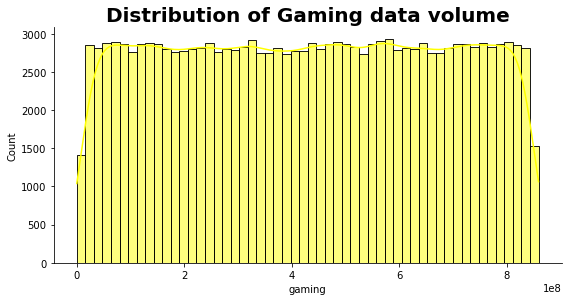

In [115]:
sns.displot(data=relevant_data, x="gaming", color='yellow', kde=True, height=4, aspect=2)
plt.title(f'Distribution of Gaming data volume', size=20, fontweight='bold')
plt.show()

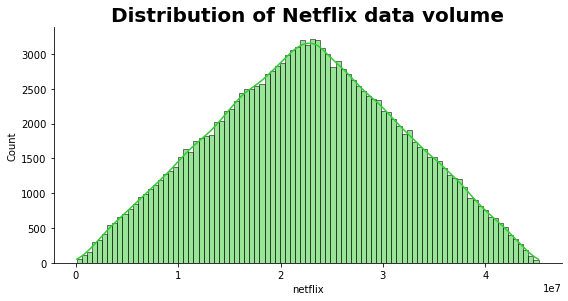

In [116]:
sns.displot(data=relevant_data, x="netflix", color='limegreen', kde=True, height=4, aspect=2)
plt.title(f'Distribution of Netflix data volume', size=20, fontweight='bold')
plt.show()

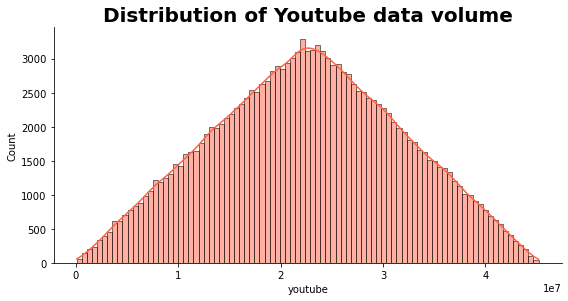

In [117]:
sns.displot(data=relevant_data, x="youtube", color='tomato', kde=True, height=4, aspect=2)
plt.title(f'Distribution of Youtube data volume', size=20, fontweight='bold')
plt.show()

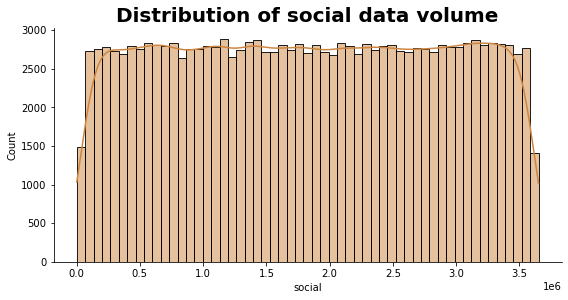

In [128]:
sns.displot(data=relevant_data, x="social", color='peru', kde=True, height=4, aspect=2)
plt.title(f'Distribution of social data volume', size=20, fontweight='bold')
plt.show()

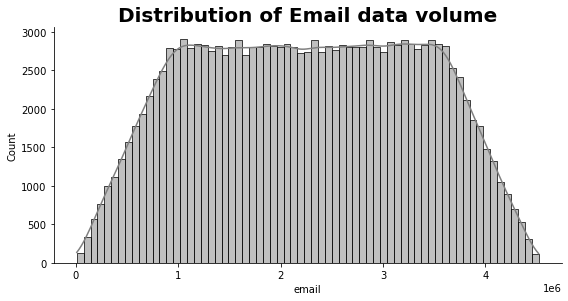

In [119]:
sns.displot(data=relevant_data, x="email", color='gray', kde=True, height=4, aspect=2)
plt.title(f'Distribution of Email data volume', size=20, fontweight='bold')
plt.show()

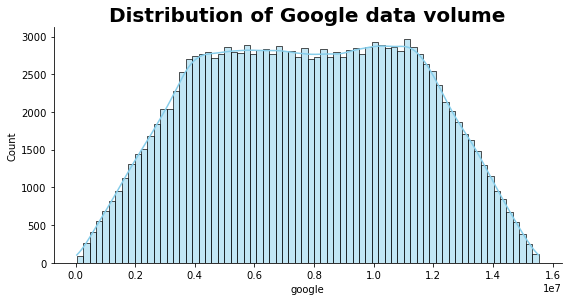

In [121]:
sns.displot(data=relevant_data, x="google", color='skyblue', kde=True, height=4, aspect=2)
plt.title(f'Distribution of Google data volume', size=20, fontweight='bold')
plt.show()

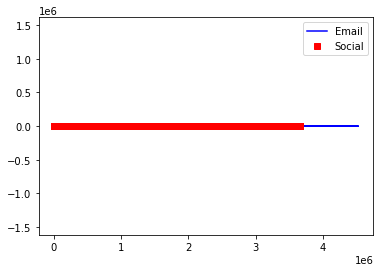

In [64]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(relevant_data['email'], np.zeros_like(relevant_data['email']), 'b', label='Email')
ax.plot(relevant_data['social'], np.zeros_like(relevant_data['social']), 'sr', label='Social')
ax.axis('equal')
leg = ax.legend();

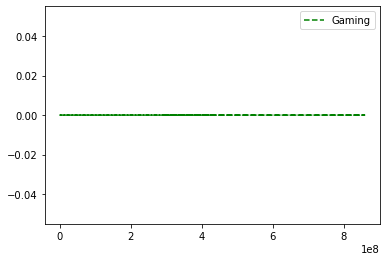

In [90]:
plt.plot(relevant_data['gaming'], np.zeros_like(relevant_data['gaming']), '--g', label="Gaming")
plt.legend()
# univariate analysis of gaming, email and social on figure above and below

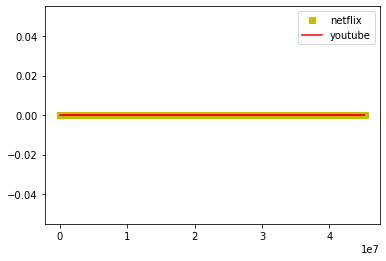

In [93]:
plt.plot(relevant_data['netflix'], np.zeros_like(relevant_data['netflix']), 'sy', label="netflix")
plt.plot(relevant_data['youtube'], np.zeros_like(relevant_data['youtube']), 'r', label="youtube")
plt.legend()

## Bivariate Analysis

### below is Bivariate analysis using each application with total data volume

It shows positive corelation, that when gaming data increase the total data volume increases too

Text(0, 0.5, 'Total Data Volume')

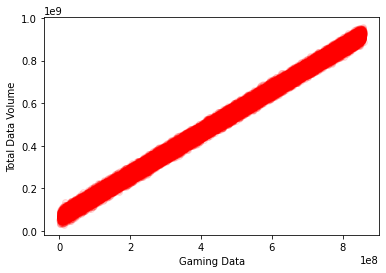

In [124]:
sum_column = df_clean["totalUL"] + df_clean["totalDL"]
plt.scatter(df_clean['gaming'], sum_column, alpha=0.1, color='red')
plt.xlabel('Gaming Data')
plt.ylabel('Total Data Volume')

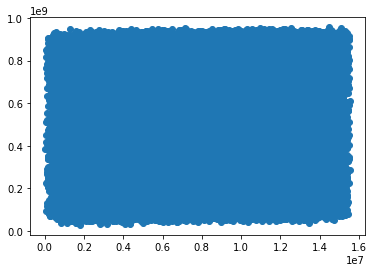

In [19]:
plt.scatter(df_clean['google'], sum_column)

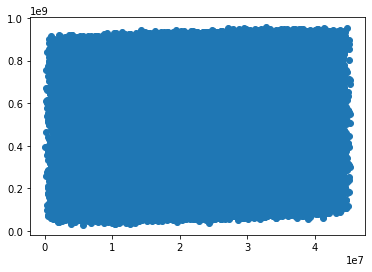

In [20]:
plt.scatter(df_clean['youtube'], sum_column)

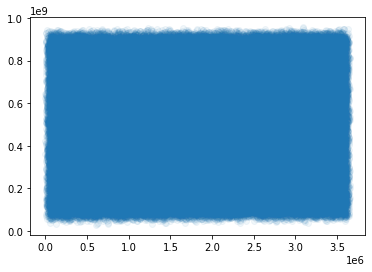

In [152]:
plt.scatter(df_clean['social'], sum_column, alpha=0.06)

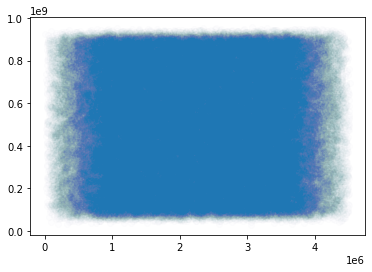

In [149]:
plt.scatter(df_clean['email'], sum_column, alpha=0.009)

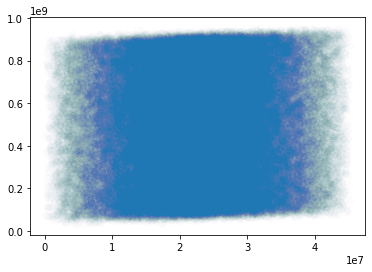

In [67]:
plt.scatter(df_clean['netflix'], sum_column, alpha=0.009)

## Corelation Analysis

#### Corelation Analysis between the Applications

In [127]:
corelation =  relevant_data[['email','gaming','google','youtube','social','netflix']].corr() 
corelation.style.background_gradient(cmap = "cool")

,email,gaming,google,youtube,social,netflix
email,1.000000,-0.000644,-0.000412,-0.002919,0.004032,0.001029
gaming,-0.000644,1.000000,-0.000994,-0.002999,0.001082,-0.003109
google,-0.000412,-0.000994,1.000000,0.002277,-0.001708,-0.001902
youtube,-0.002919,-0.002999,0.002277,1.000000,0.000548,0.002882
social,0.004032,0.001082,-0.001708,0.000548,1.000000,0.001013
netflix,0.001029,-0.003109,-0.001902,0.002882,0.001013,1.000000


## Few insights from corelation table

I) There is a positive corelation between social media and email which is 0.004 far higher than relation to others
II) There is negative corelation between gaming and email which is -0.0006, those who use gaming apps dont use much emails
III) There is negative corelation between google and email which is -0.0004, those who use google dont use much emails

#### Variable Transformation, segmenting into five classes

Text(0, 0.5, 'Data Transfers')

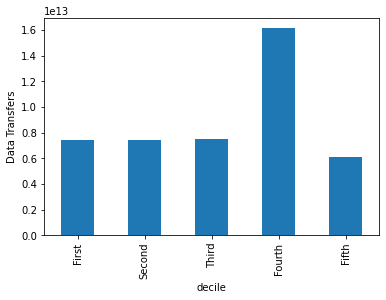

In [161]:
relevant_data['totaldata']=sum_column

relevant_data['decile'] = pd.qcut(relevant_data['dur'],10,duplicates='drop')
ax=relevant_data.groupby('decile')['totaldata'].sum().head(5).plot(kind='bar',xticks=[0,1,2,3,4])
ax.set_xticklabels(['First','Second','Third','Fourth','Fifth'])
ax.set_ylabel('Data Durations')